In [25]:
MEASUREMENTS_MAC_LONG = [
    5.44,
    5.39,
    5.46,
    5.36,
    5.33,
    5.38,
    5.25,
    5.43,
]
MEASUREMENTS_MAC_SHORT = [
    4.49,
    4.61,
    4.71,
    4.58,
    4.56,
    4.48,
    4.58,
    4.65,
]

MEASUREMENTS_IPHONE_LONG = [
    3.73,
    3.75,
    3.65,
    3.73,
    3.80,
    3.85,
    3.71,
    3.85,
]
MAC_LONG_LENGTH = 0.3126
MAC_SHORT_LENGTH = 0.2212
IPHONE_LONG_LENGTH = 0.1467

In [23]:
!pip3 install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 9.0 MB/s eta 0:00:0000:01m00:01
  Using cached fonttools-4.38.0-py3-none-any.whl (965 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 746.2 kB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.2/63.2 kB 119.2 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 17.7 MB/s eta 0:00:0000:0100:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.3 -> 23.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [26]:
from math import sqrt, pi
from typing import List

def calc_g(t_5_cycles: float, length: float) -> float:
    period = t_5_cycles / 5.0
    angular_freq = (2 * pi) / period
    g = angular_freq**2 * length
    return g

def mean(values: List[float]) -> float:
    return sum(values) / float(len(values))

def population_variance(values: List[float]) -> float:
    return mean([x**2 for x in values]) - mean(values)**2

def variance(values: List[float]) -> float:
    mu = mean(values)
    return sum([(x - mu)**2 for x in values]) / float(len(values) - 1)

def std_dev(values: List[float]) -> float:
    return sqrt(variance(values))

def uncertainty(values: List[float]) -> float:
    return std_dev(values) / sqrt(float(len(values)))

def report_data(values: List[float], title: str):
    print(title)
    print("Mean: ", mean(values))
    print("Standard Deviation: ", std_dev(values))

MAC_LONG_G = [calc_g(t, MAC_LONG_LENGTH) for t in MEASUREMENTS_MAC_LONG]
MAC_SHORT_G = [calc_g(t, MAC_SHORT_LENGTH) for t in MEASUREMENTS_MAC_SHORT]
IPHONE_LONG_G = [calc_g(t, IPHONE_LONG_LENGTH) for t in MEASUREMENTS_IPHONE_LONG]

report_data(MAC_LONG_G, "Mac Long")
report_data(MAC_SHORT_G, "Mac Short")
report_data(IPHONE_LONG_G, "IPhone Long")

overall_mean = mean(MAC_LONG_G + MAC_SHORT_G + IPHONE_LONG_G)
overall_std_dev = std_dev(MAC_LONG_G + MAC_SHORT_G + IPHONE_LONG_G)
print()
print("Overall mean g: ", overall_mean)
print("Overall standard deviation of g: ", overall_std_dev)
print("Overall uncertainty: ", uncertainty(MAC_LONG_G + MAC_SHORT_G + IPHONE_LONG_G))



Mac Long
Mean:  10.66371690960912
Standard Deviation:  0.2732668526207873
Mac Short
Mean:  10.403945149045787
Standard Deviation:  0.3469354034936233
IPhone Long
Mean:  10.257413511030455
Standard Deviation:  0.38159972323213953

Overall mean g:  10.441691856561787
Overall standard deviation of g:  0.36487214222135866
Overall uncertainty:  0.0744792141498786


# Notes

## Assembly
String tied to water bottle cap, measured using Apple device dimensions, held between my thumbnail and table. Time measured with stopwatch by hand.

## Sources of Uncertainty
Systematic:
- Weight of string
- Water bottle cap not a point mass, distribution of weight matters
- Friction on string between my finger and table
- Drag
- Small angle approximation

Statistical:
- Hand-timing error

## Experimental Variables
- Periods measured
- Length of string

Experiment was performed with periods measured always 5, and 3 sets of 8 measurements with different lengths of string.

In [ ]:
# don't use small angle
# calculate damping and change string length to calculate com
# long physical pendulum
# minimize damping
# slow motion
# better precision stopwatch
# Run a string through a thin pipe?
# Take more measurements of length to get a more accurate answer

In [24]:
import numpy as np
import pandas as pd

df = pd.read_csv("pendulumData.csv")
print(df.head())
df['sys uncert'] = pd.to_numeric(df['sys uncert']).fillna(0)
df['stat uncert'] = df['stat uncert'].fillna(0)
df['total uncert'] = df['total uncert'].fillna(df['stat uncert'].add(df['sys uncert']))
# print(df.head())

TypeError: arg must be a list, tuple, 1-d array, or Series

In [63]:
import math
math.isnan(pd.read_csv("pendulumData.csv")['g (m/s2)'][20])

False

(array([  6.,  22., 175.,  21.,   4.,   3.,   0.,   0.,   1.,   1.]),
 array([ 7.73 ,  8.527,  9.324, 10.121, 10.918, 11.715, 12.512, 13.309,
        14.106, 14.903, 15.7  ]),
 <BarContainer object of 10 artists>)

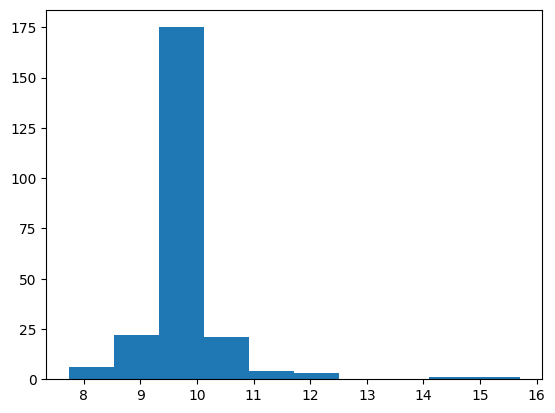

In [49]:
from matplotlib import pyplot as plt

g = np.array(list(filter(lambda x: x < 100, g)))
plt.hist(g)

In [ ]:
2+2

: 